# BI Assignment 2: Data Analytics

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visual Data Analysis - Data Understanding


Attribute Types and their Semantics:
track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

Statistical Properties of the Dataset:
       track_popularity  danceability        energy           key  \
count      

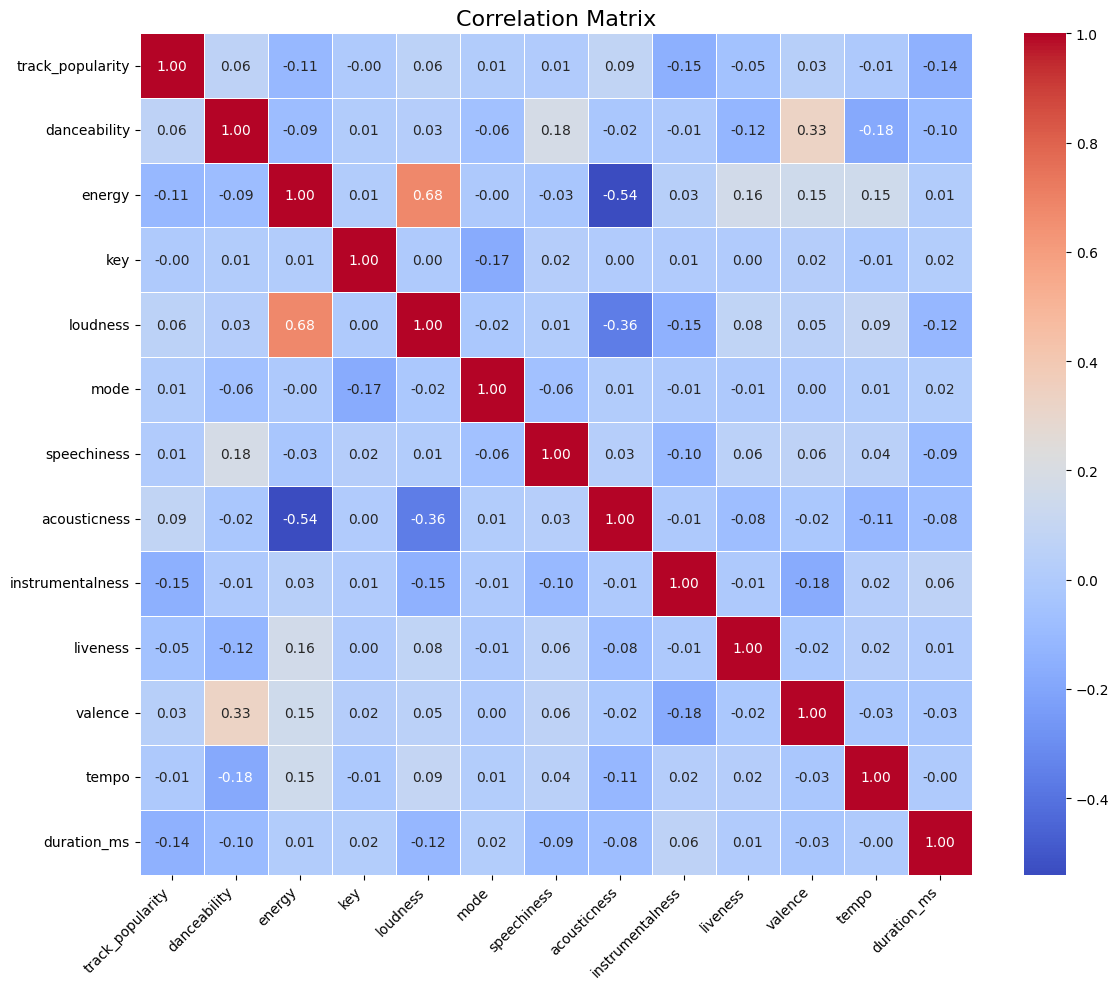

In [7]:
df = pd.read_csv("spotify_songs.csv")

# a. Attribute types and their semantics
print("\nAttribute Types and their Semantics:")
print(df.dtypes)

# b. Statistical properties of the dataset including correlations
print("\nStatistical Properties of the Dataset:")
print(df.describe())

print("\nCorrelation Matrix:")
numerical_features = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_features].corr()
print(corr_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt='.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


Missing Values:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Outliers per Numerical Feature (Z-score > 3):
track_popularity       0
danceability         123
energy               166
key                    0
loudness             368
mode                   0
speechiness          612
acousticness         657
instrumentalness    1692
liveness

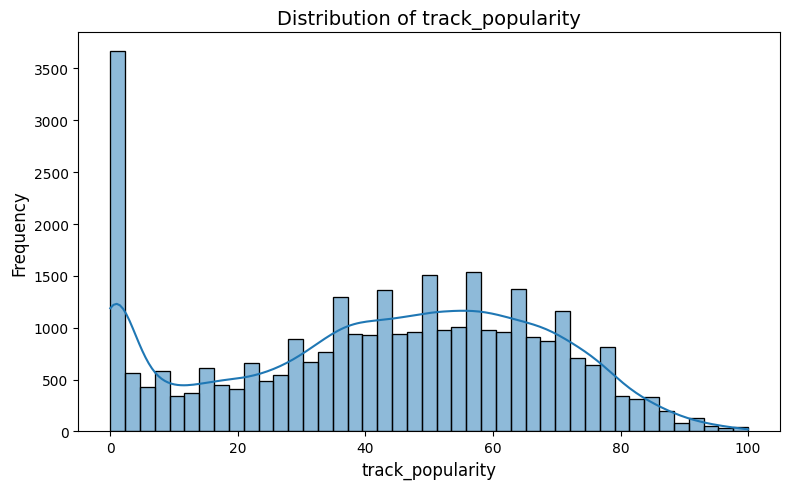

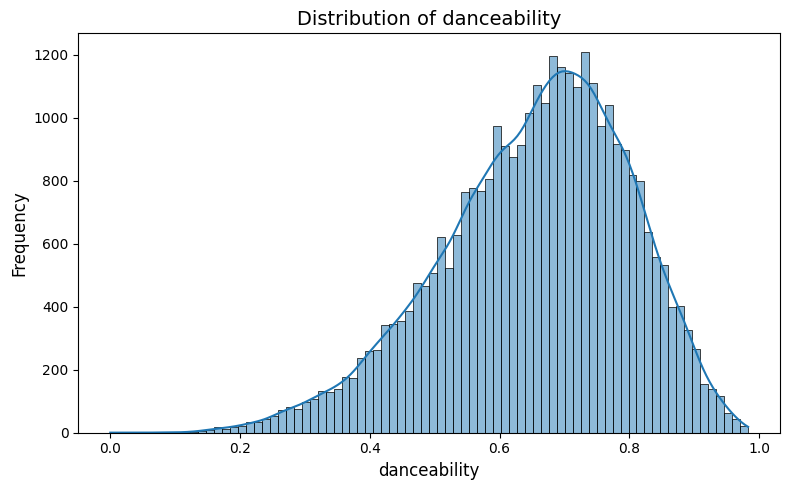

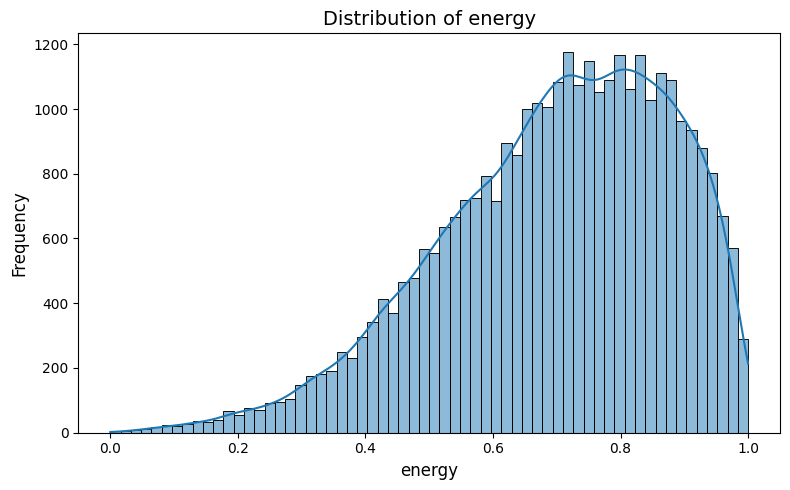

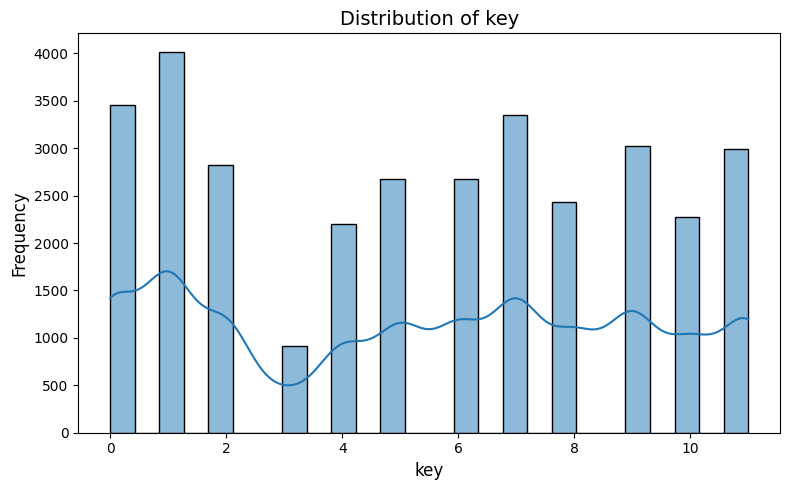

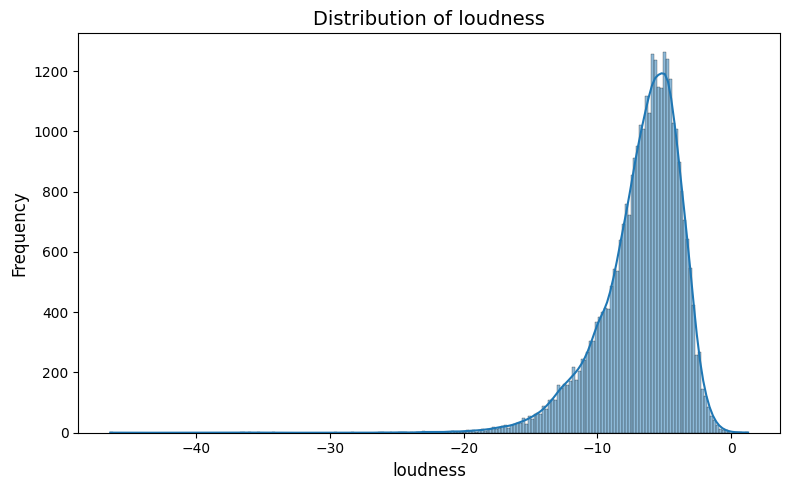

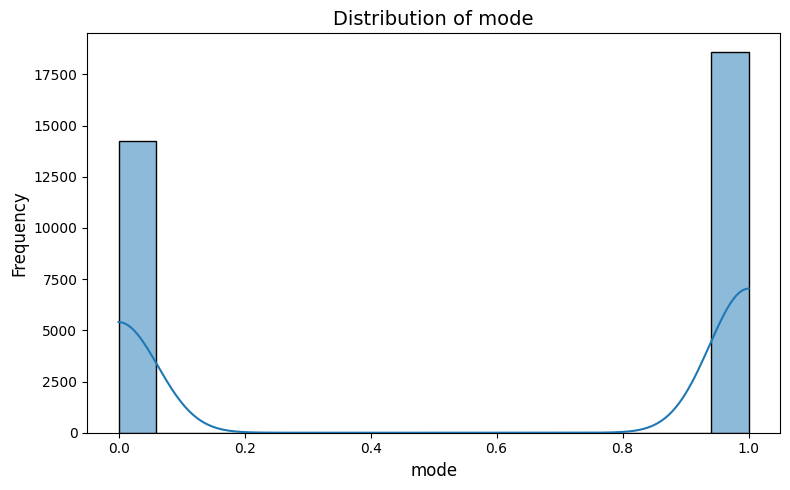

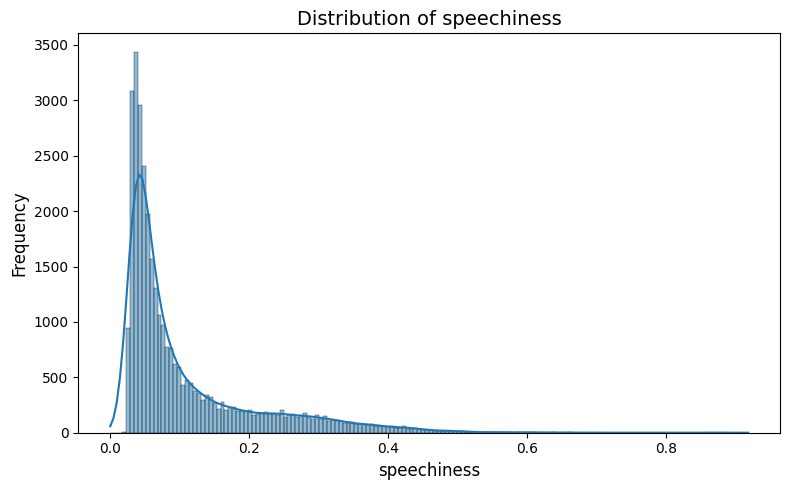

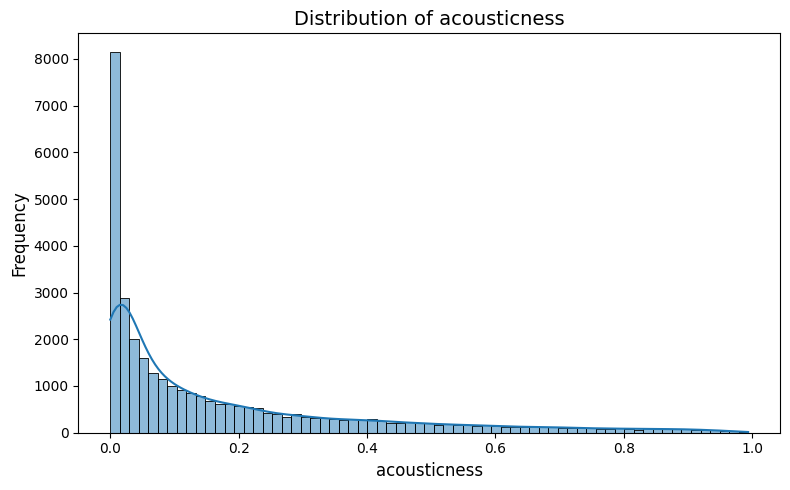

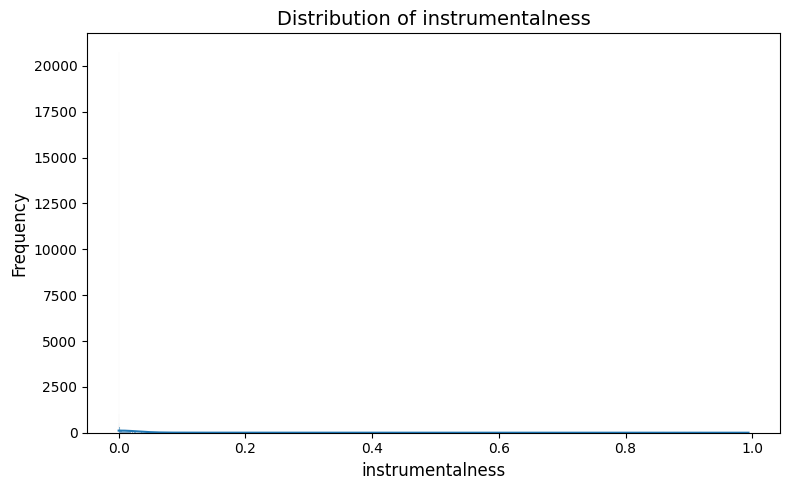

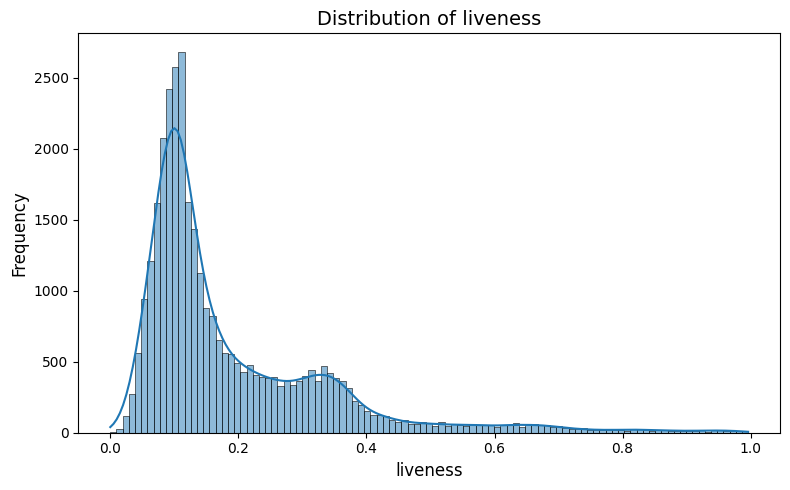

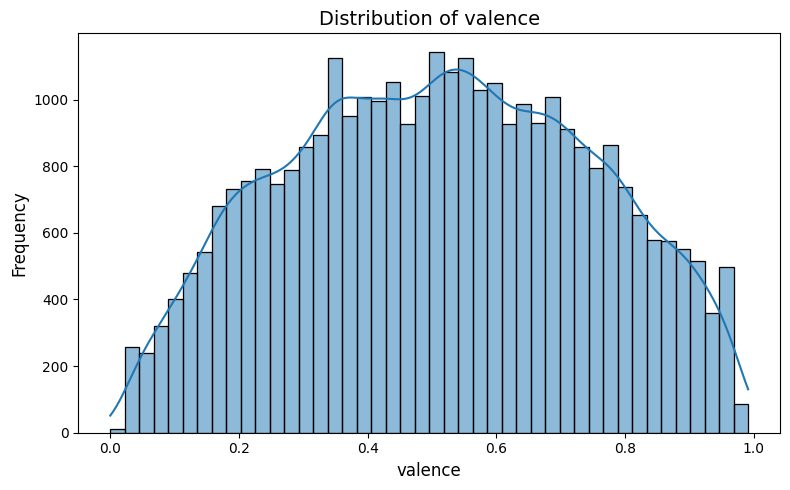

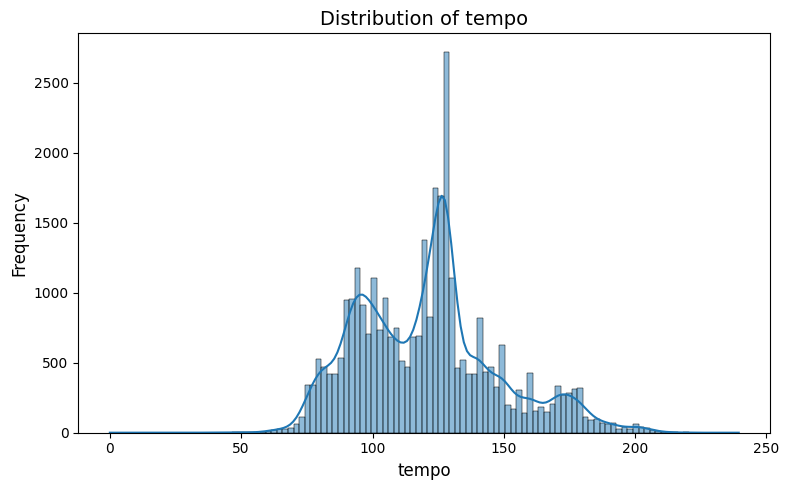

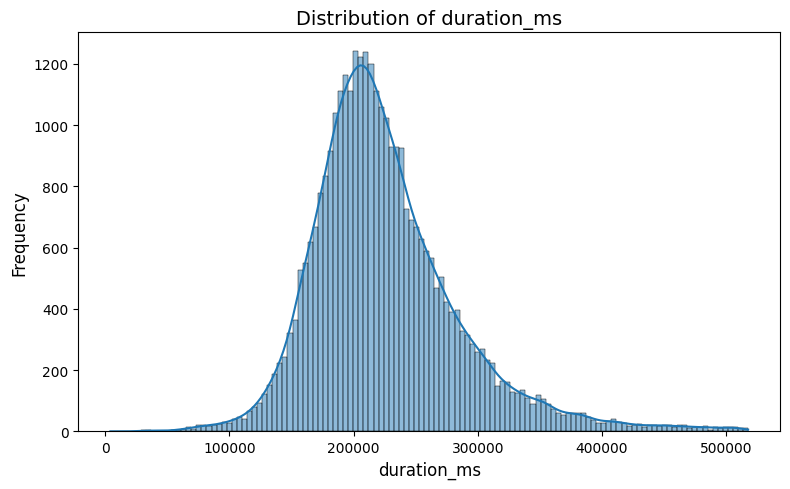

In [8]:
# c. Data quality aspects: missing values, outliers, and plausibility
def check_data_quality(df):
    # Missing Values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Identifying Outliers using Z-score
    from scipy.stats import zscore
    numerical_features = df.select_dtypes(include=[np.number]).columns
    z_scores = np.abs(zscore(df[numerical_features]))
    outliers = (z_scores > 3).sum(axis=0)
    print("\nOutliers per Numerical Feature (Z-score > 3):")
    print(outliers)

    # Value Distribution
    for col in numerical_features:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.tight_layout()
        plt.show()

check_data_quality(df)

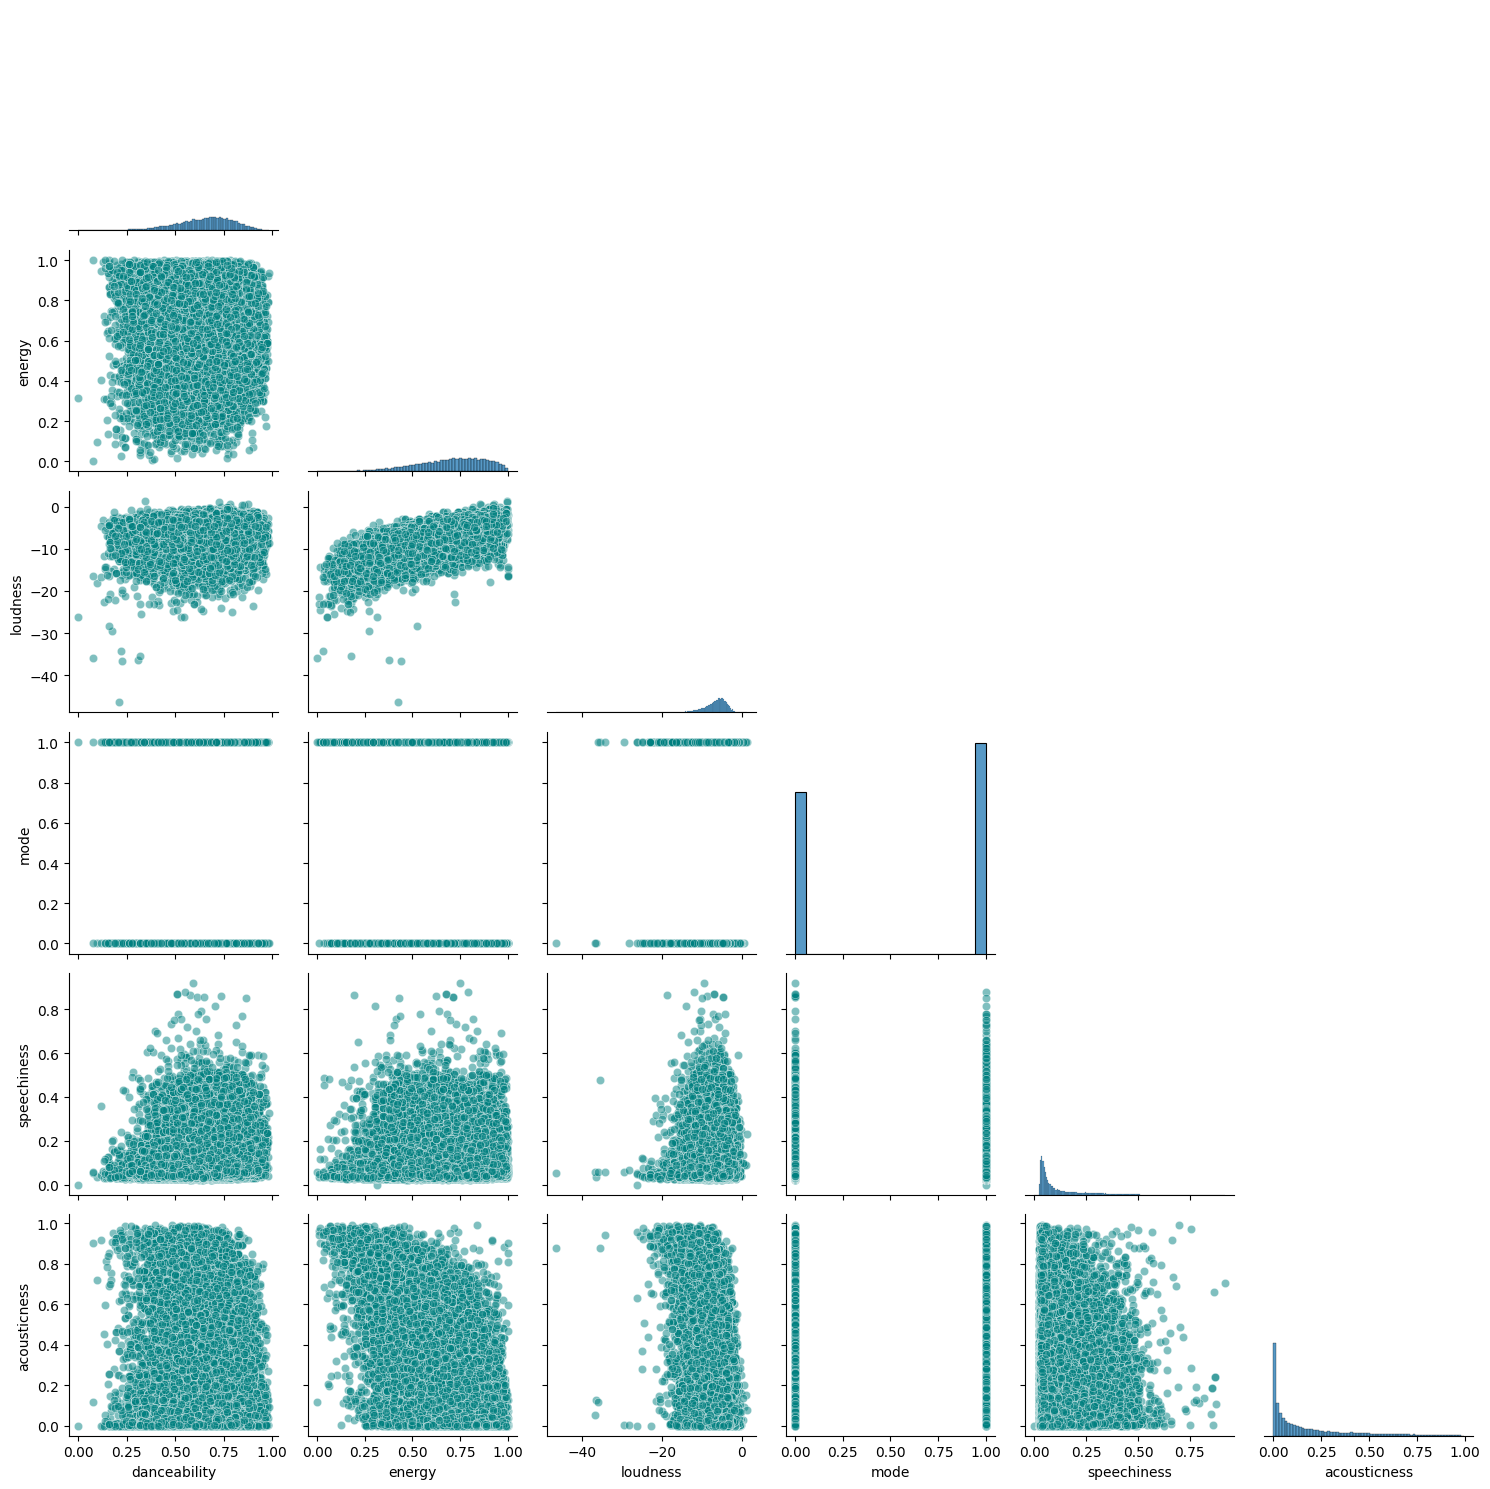

In [9]:
# Define numerical features to include in pairplot
numerical_features = [
    'danceability', 'energy', 'playlist_genre', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]

# Improve the pairplot by:
# 1. Using a smaller subset of features at a time.
# 2. Reducing the figure size for better analysis.
# 3. Adding a histogram for the diagonal for better distribution visualization.

# Create a pairplot with improved parameters
sns.pairplot(df[numerical_features[:7]], diag_kind='hist', corner=True, plot_kws={'alpha': 0.5, 'color': 'teal'}, height=2.5)
plt.tight_layout()
plt.show()


Evaluating Sensitive Attributes and Bias:

Distribution for playlist_genre:
playlist_genre
edm      18.405263
rap      17.500685
pop      16.772759
r&b      16.541285
latin    15.700667
rock     15.079341
Name: proportion, dtype: float64


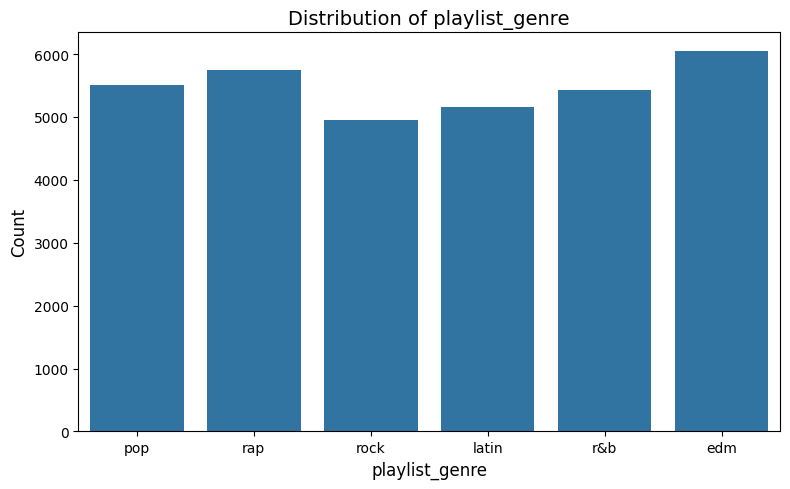


Distribution for mode:
mode
1    56.571133
0    43.428867
Name: proportion, dtype: float64


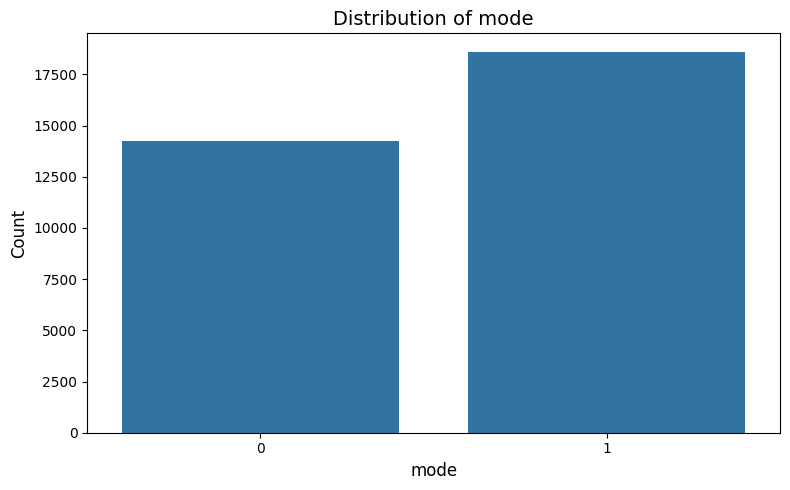

In [10]:
# e. Evaluation of ethically sensitive attributes and potential biases
def evaluate_bias(df):
    print("\nEvaluating Sensitive Attributes and Bias:")
    # Here you can evaluate bias for sensitive attributes like 'gender', 'ethnicity', etc.
    for col in df.columns:
        if df[col].nunique() < 10:  # Assuming categorical with few unique values
            print(f"\nDistribution for {col}:")
            print(df[col].value_counts(normalize=True) * 100)
            plt.figure(figsize=(8, 5))
            sns.countplot(x=col, data=df)
            plt.title(f"Distribution of {col}", fontsize=14)
            plt.xlabel(col, fontsize=12)
            plt.ylabel("Count", fontsize=12)
            plt.tight_layout()
            plt.show()

evaluate_bias(df)

In [11]:
# f. Identify potential risks and biases in the data
def identify_risks(df):
    print("\nIdentifying Potential Risks and Bias:")
    # Check for imbalance in categorical variables
    for col in df.columns:
        if df[col].dtype == 'object' and df[col].nunique() < 10:
            imbalance_ratio = df[col].value_counts(normalize=True)
            if any(imbalance_ratio > 0.8):
                print(f"High Imbalance Detected in {col}:")
                print(imbalance_ratio)

identify_risks(df)


Identifying Potential Risks and Bias:



Suggested Actions for Data Preparation:
- Consider imputing or removing missing values for the following columns:
track_name          5
track_artist        5
track_album_name    5
dtype: int64

Missing Values:


track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Outliers per Numerical Feature (Z-score > 3):
track_popularity       0
danceability         123
energy               166
key                    0
loudness             368
mode                   0
speechiness          612
acousticness         657
instrumentalness    1692
liveness             831


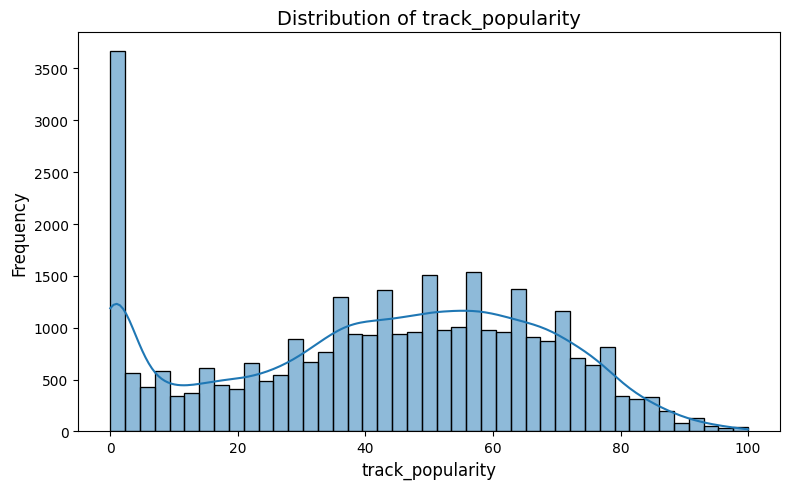

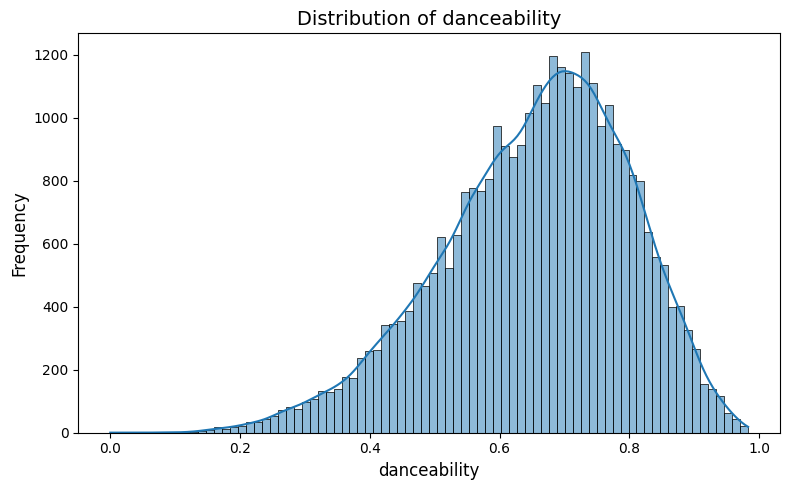

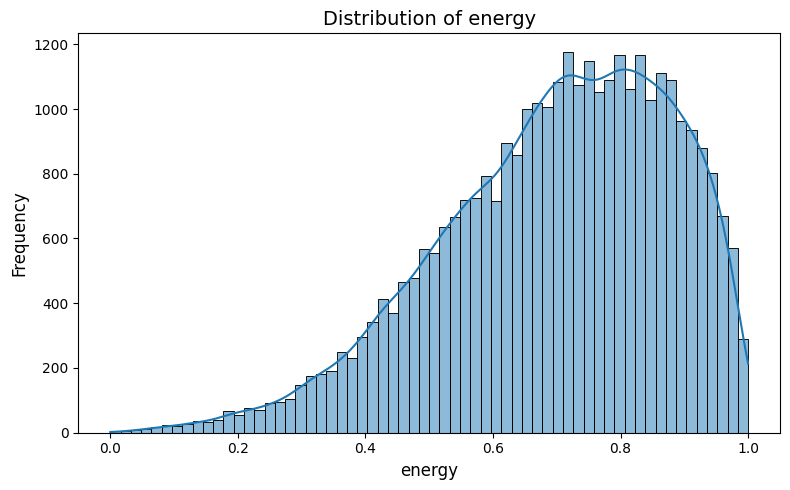

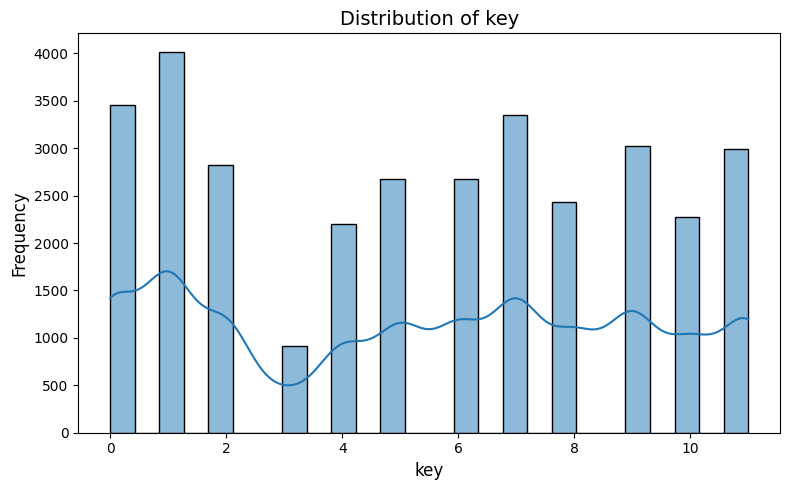

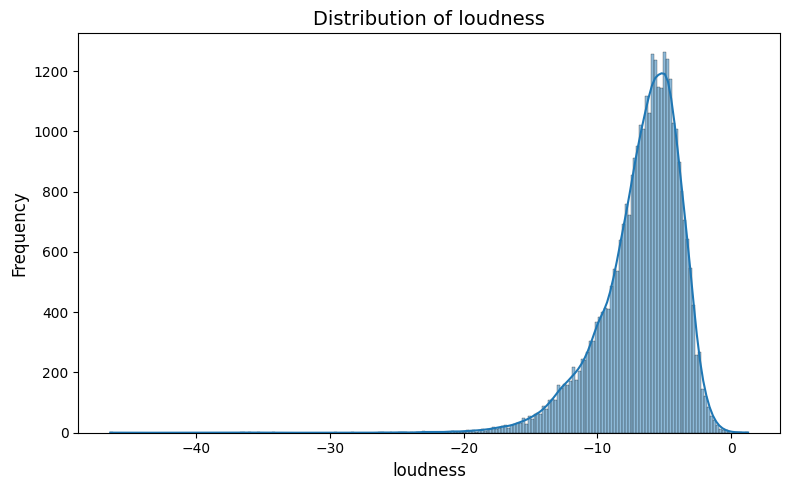

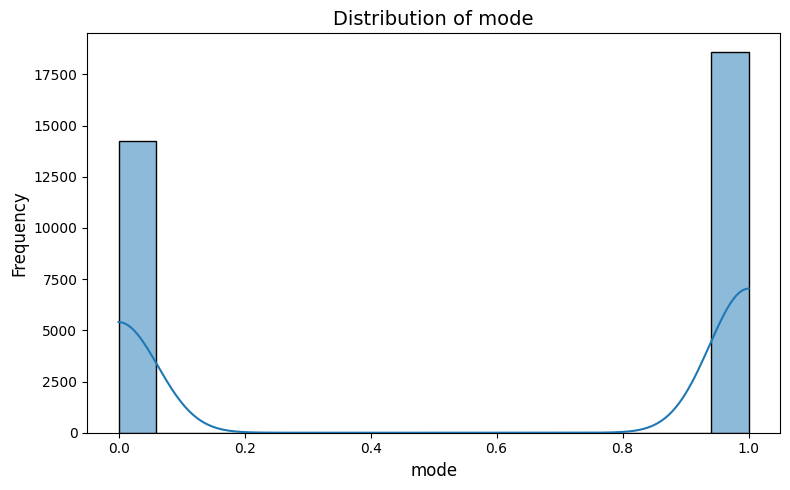

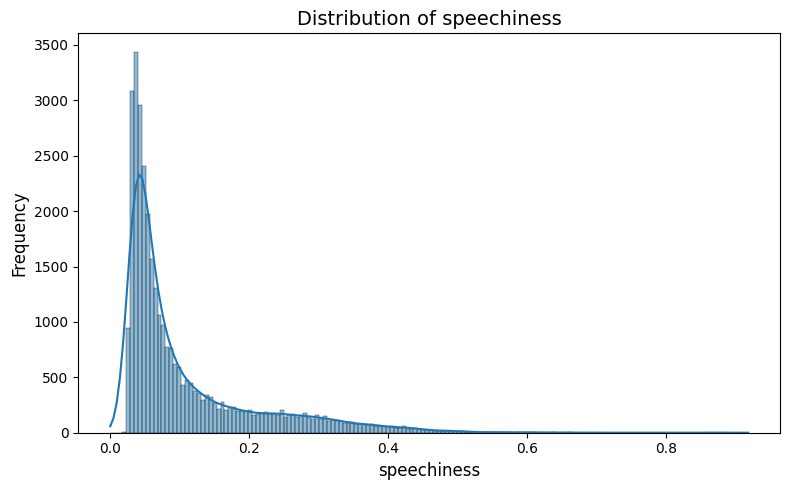

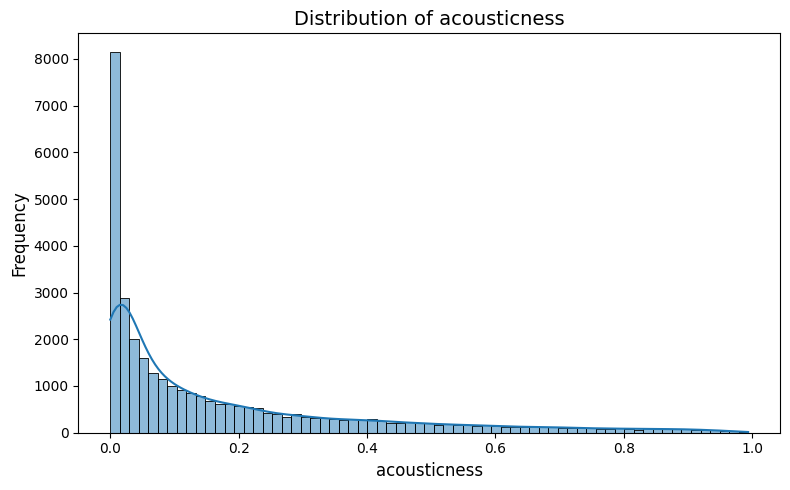

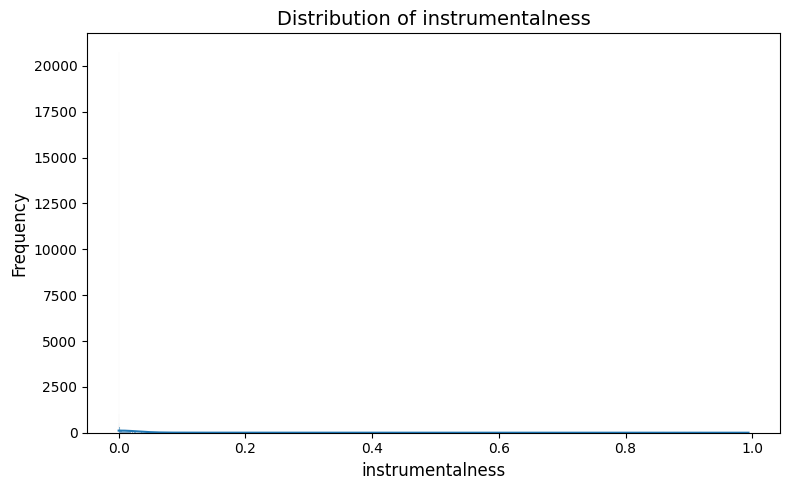

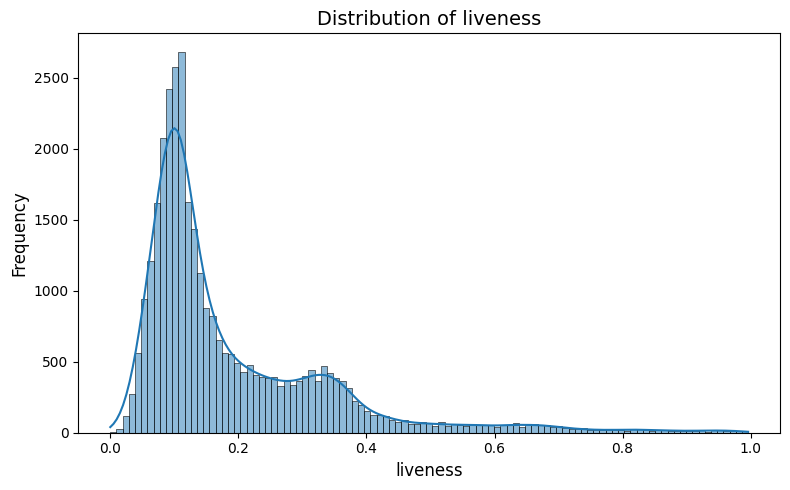

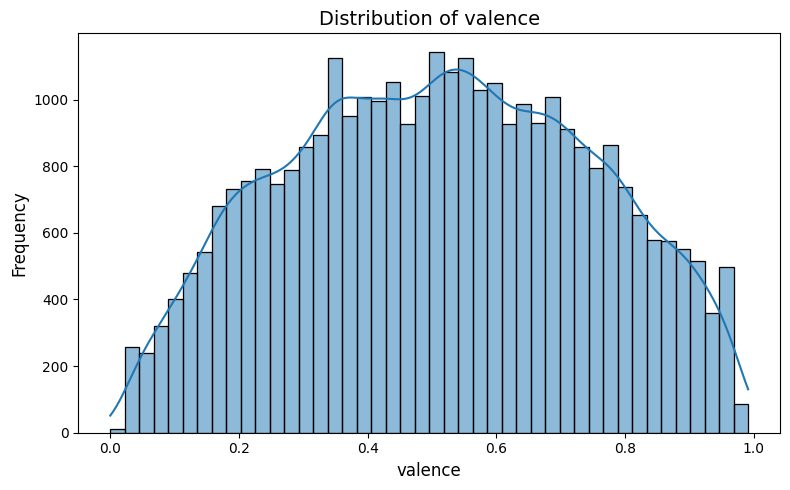

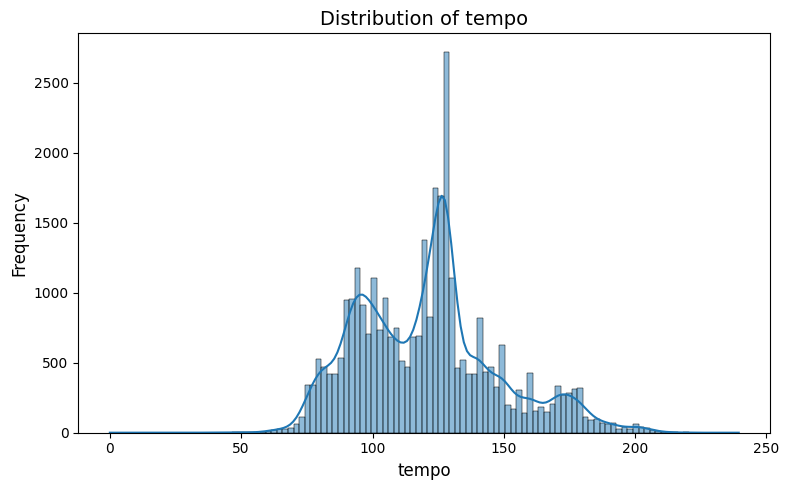

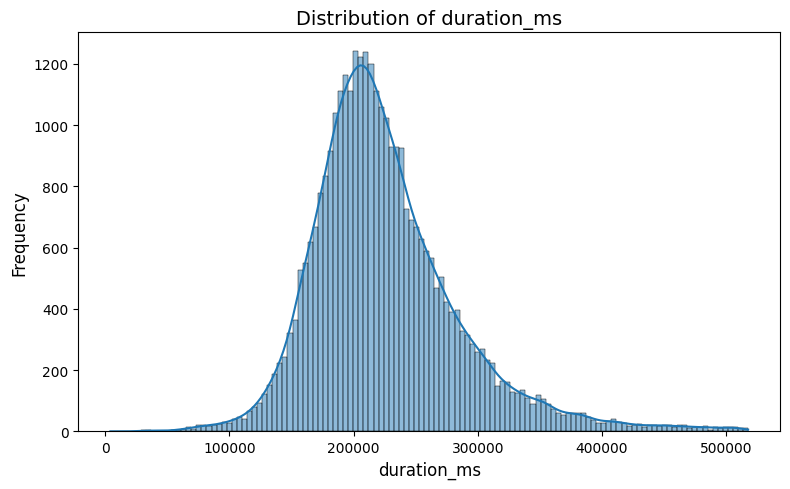

- Consider removing or transforming outliers.

Identifying Potential Risks and Bias:
- Consider resampling techniques to address imbalances, such as SMOTE or undersampling.


In [12]:
def suggest_actions(df):
    print("\nSuggested Actions for Data Preparation:")
    # Handling Missing Values
    missing = df.isnull().sum()
    if missing.any():
        print("- Consider imputing or removing missing values for the following columns:")
        print(missing[missing > 0])
    
    # Handling Outliers
    check_data_quality(df)
    print("- Consider removing or transforming outliers.")
    
    # Handling Imbalanced Data
    identify_risks(df)
    print("- Consider resampling techniques to address imbalances, such as SMOTE or undersampling.")

suggest_actions(df)

# Dataset Pre-processing - Data Preparation

In [13]:
# Show all lines with missing values
df[df.isnull().any(axis=1)]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


# Attribute removal

In [14]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [15]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

Now we have to drop columns which will not have any relevant effect on our model. These are the IDs and the song titles and artists.

In [16]:
df = df.drop(columns=['track_id','track_name','track_artist','track_album_id','track_album_name','playlist_id','playlist_name'])

In [17]:
df.dtypes

track_popularity              int64
track_album_release_date     object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

### Convert Date

In [18]:
# Convert column to datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], format='ISO8601')

# Extract the year from the date
df['album_release_year'] = df['track_album_release_date'].dt.year

# Drop the original date column if not needed
df = df.drop(columns=['track_album_release_date'])

df.head()

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year
0,66,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019
1,67,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019
2,70,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019
3,60,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019
4,69,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019


### Convert strings

In [19]:
df['playlist_genre'].nunique()

6

In [20]:
df['playlist_subgenre'].nunique()

24

In [21]:
# Perform one-hot encoding for 'playlist_genre' and 'playlist_subgenre'
df_encoded = pd.get_dummies(df, columns=['playlist_genre', 'playlist_subgenre'])

df_encoded.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,...,False,False,False,False,False,False,False,False,False,False
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,...,False,False,False,False,False,False,False,False,False,False
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,...,False,False,False,False,False,False,False,False,False,False
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,...,False,False,False,False,False,False,False,False,False,False
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df_encoded.dtypes

track_popularity                                 int64
danceability                                   float64
energy                                         float64
key                                              int64
loudness                                       float64
mode                                             int64
speechiness                                    float64
acousticness                                   float64
instrumentalness                               float64
liveness                                       float64
valence                                        float64
tempo                                          float64
duration_ms                                      int64
album_release_year                               int32
playlist_genre_edm                                bool
playlist_genre_latin                              bool
playlist_genre_pop                                bool
playlist_genre_r&b                                bool
playlist_g

In [23]:
df_encoded.to_csv("spotify_songs_encoded.csv", index=False)